
# Objective:
**The Ojective of this project is to build a model which can easily classify/predict customers who are inactive(Churn) or active(Not Churn) by using Machine Learning Algorithms.**


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings as wr
wr.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics

# 1. Data Extraction

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

# 2. Data Audit or Data Check

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# 3. Data Cleaning

In [7]:
# checking null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# checking duplicated records
df.duplicated().sum()

np.int64(0)

# 4. Exploratory Data Analysis

In [9]:
# Checking correlation on numerical features
df.select_dtypes(include='number').corr()


RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

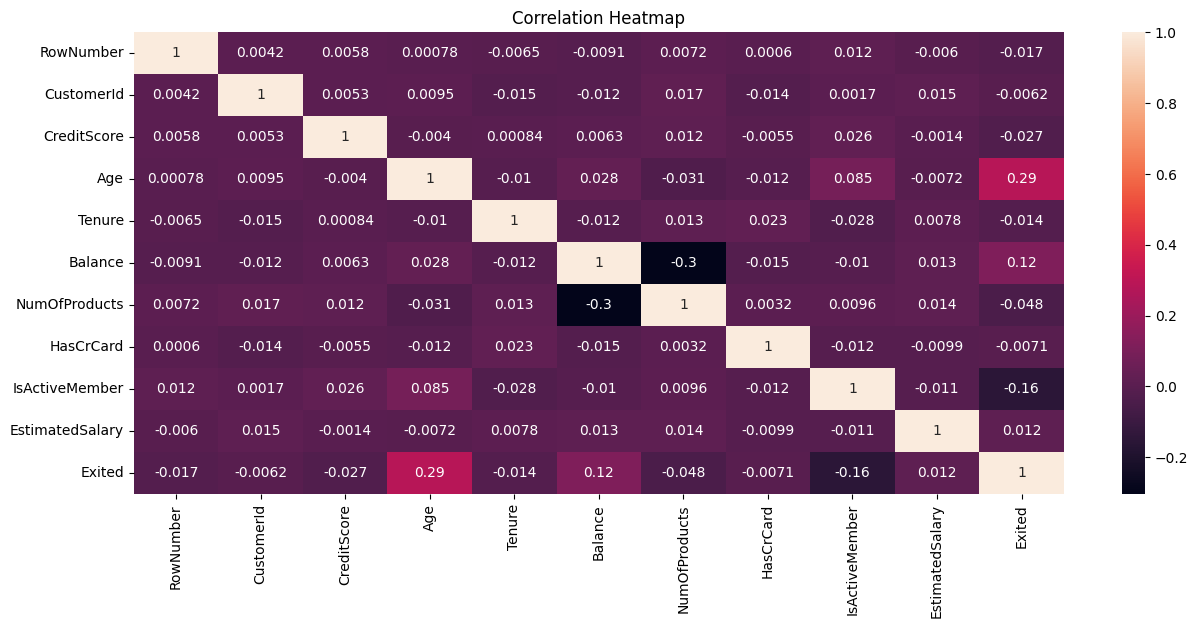

In [10]:
# visualizing correlation
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

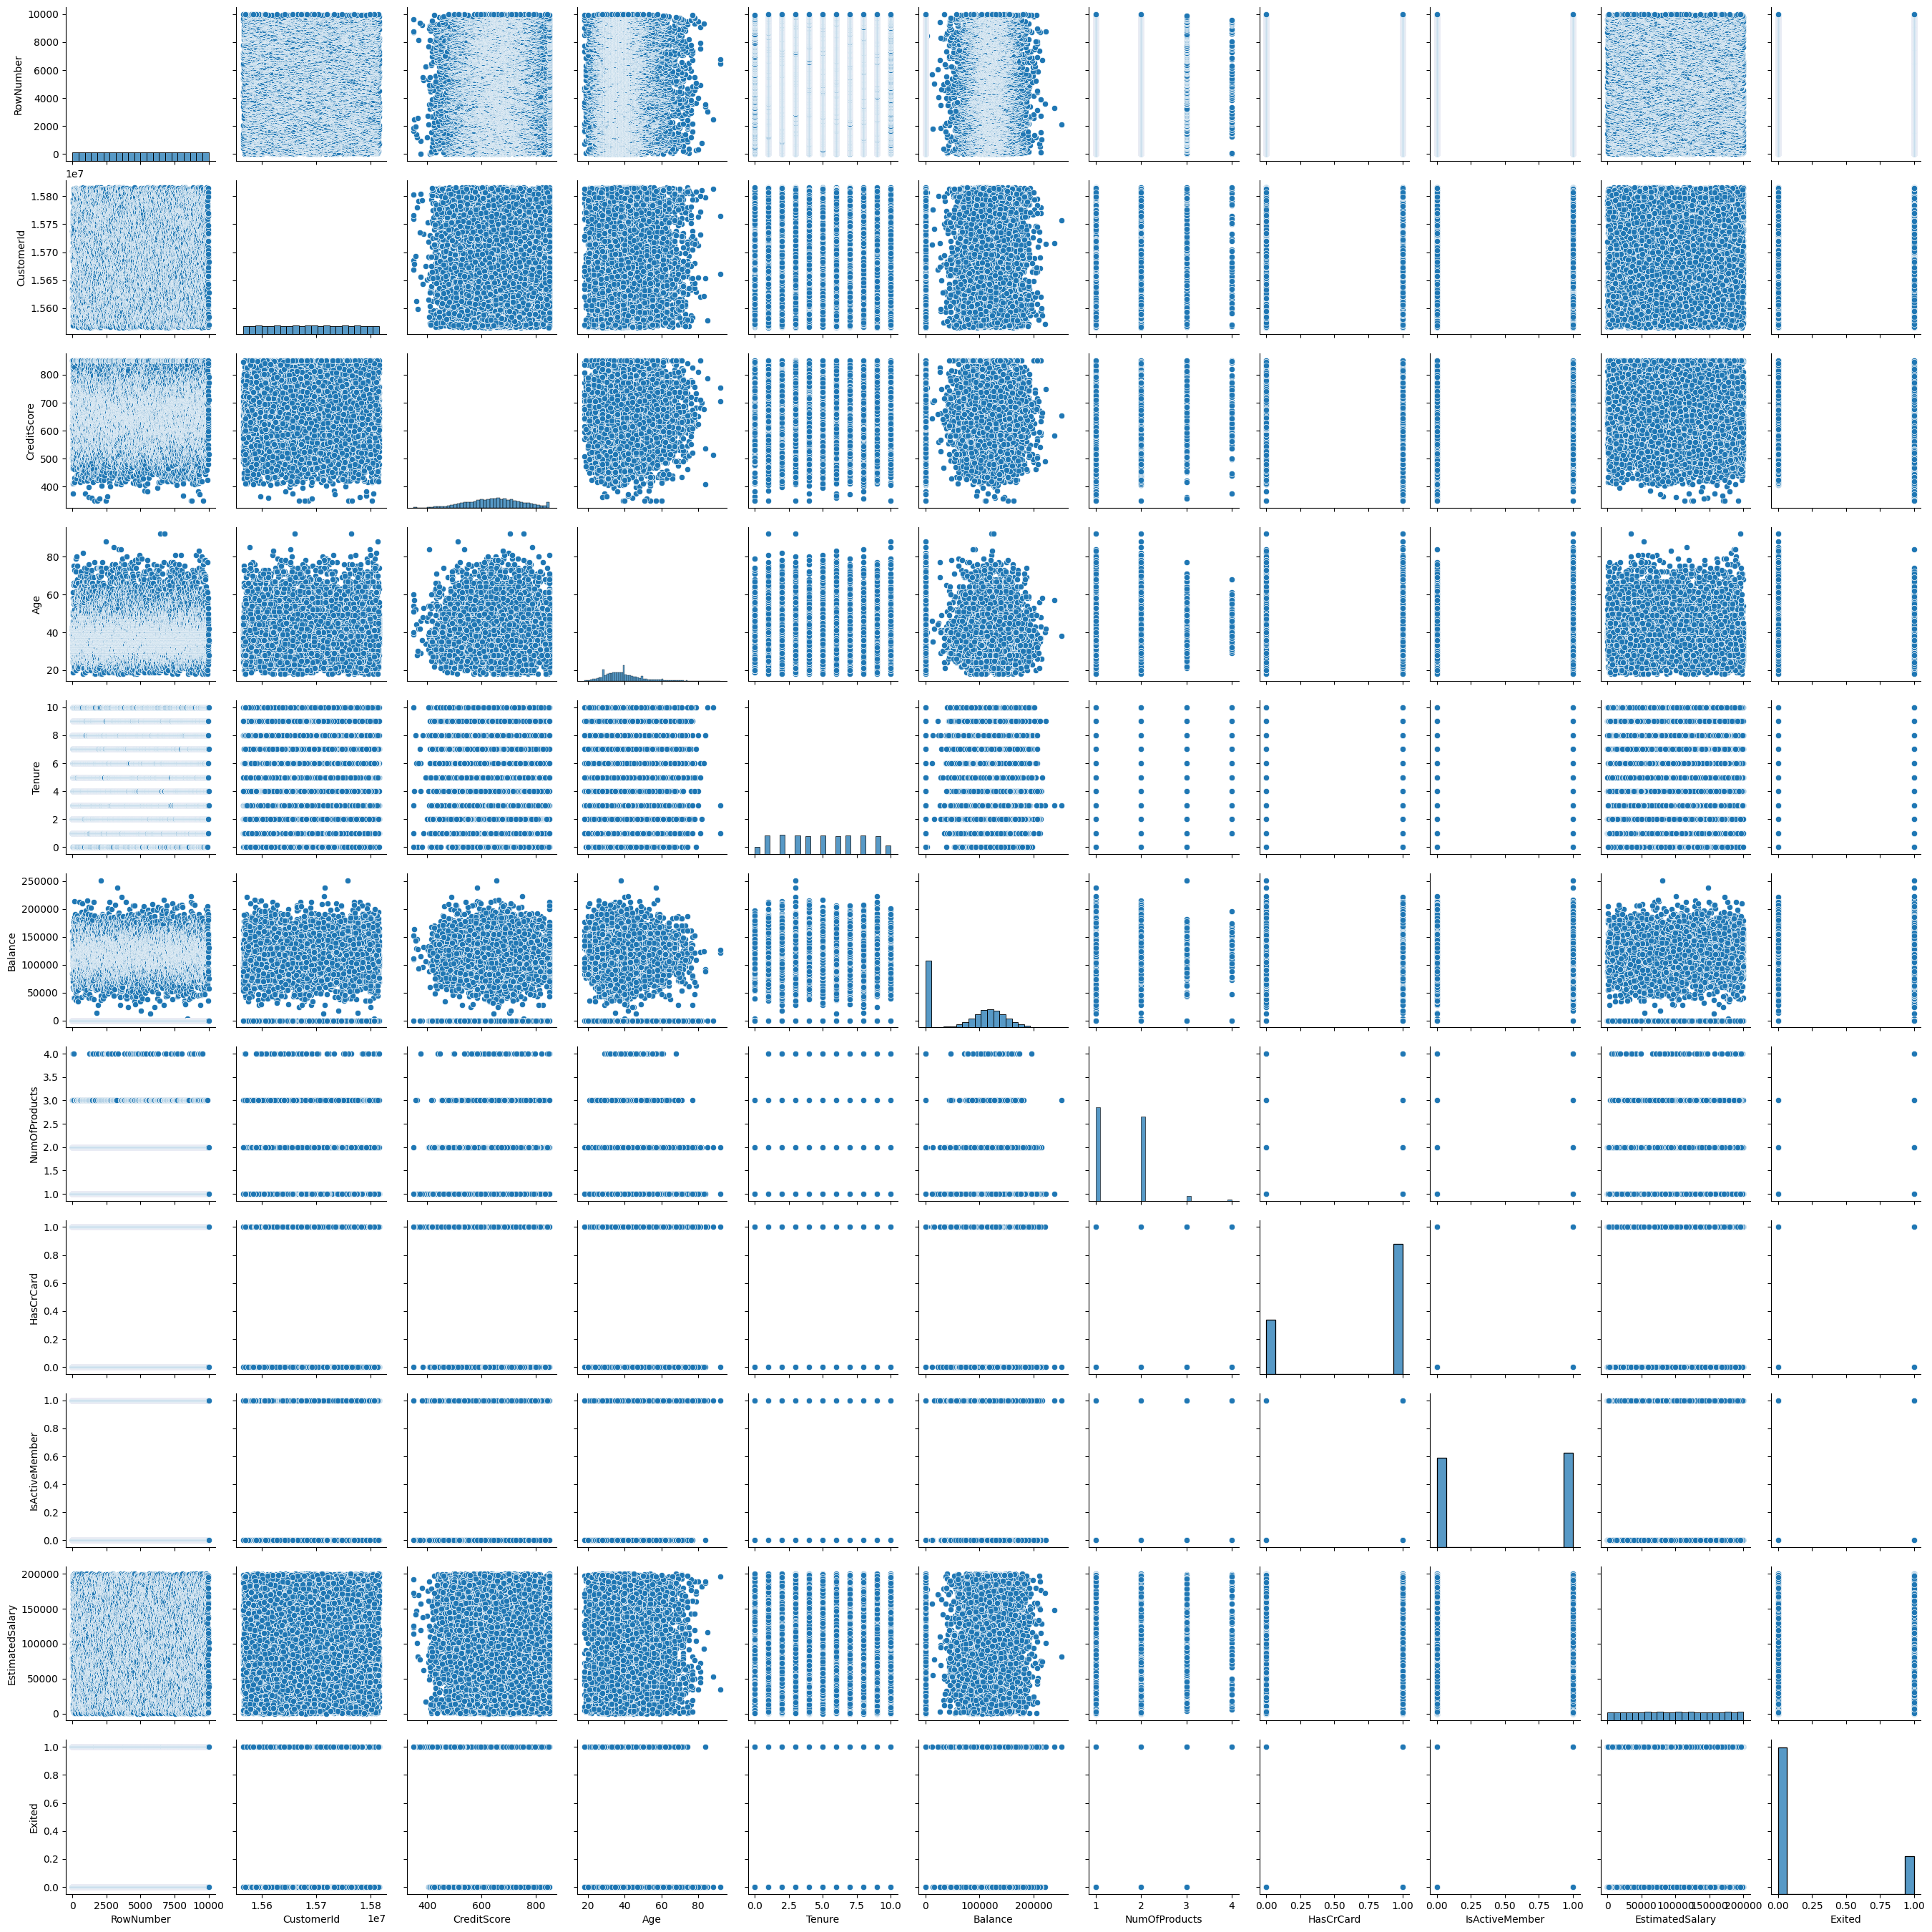

In [11]:
sns.pairplot(df)

In [12]:
num_df = df.select_dtypes(include=np.number)
cat_df = df.select_dtypes(include='object')

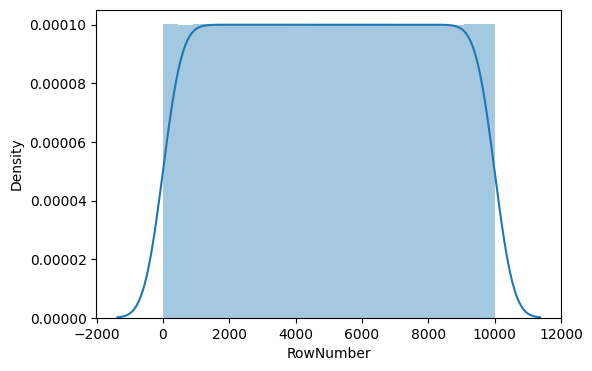

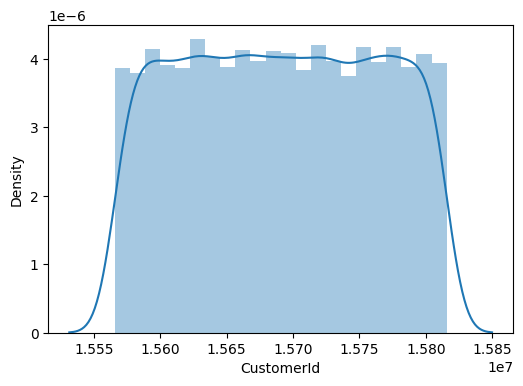

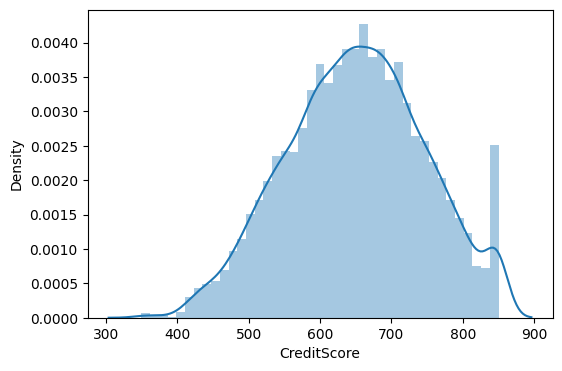

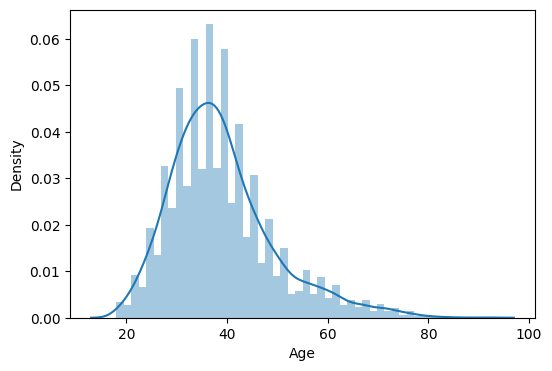

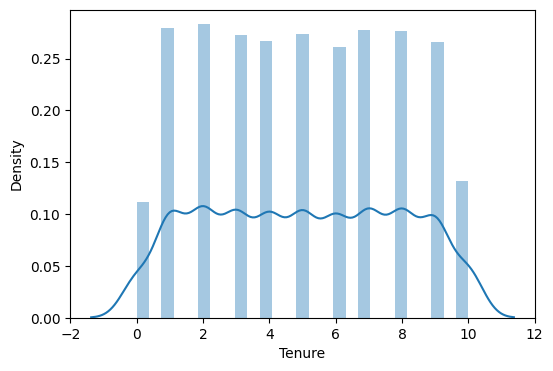

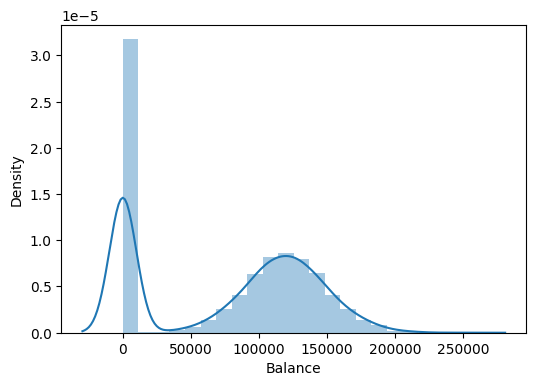

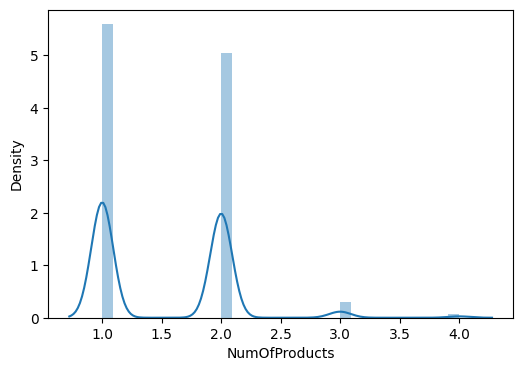

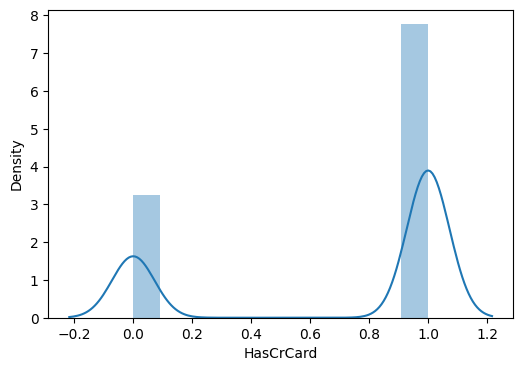

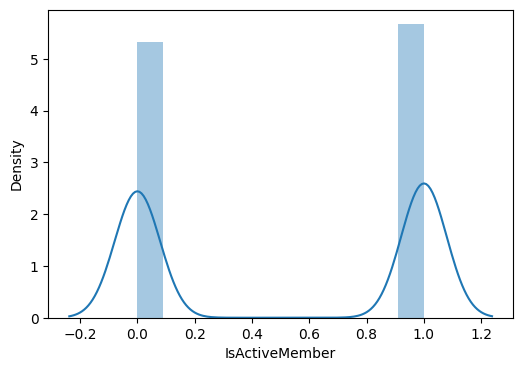

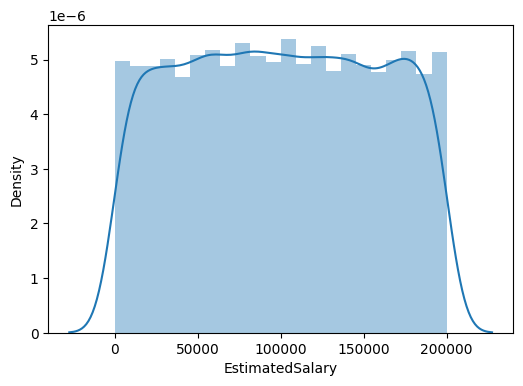

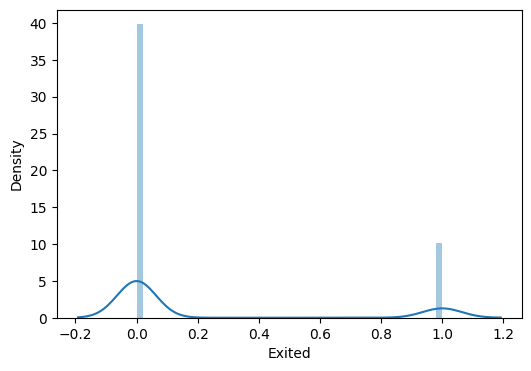

In [13]:
# Performing Univaraie Analysis
for col in num_df.columns:
    plt.figure(figsize=(6,4))
    sns.distplot(num_df[col])
    plt.show()

In [14]:
for col in cat_df.columns:
  print(cat_df[col].value_counts())

Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [15]:
# Visualizing the Gender column vs Churn
P1 = df.groupby('Gender')['Exited'].value_counts()
print(P1)

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64


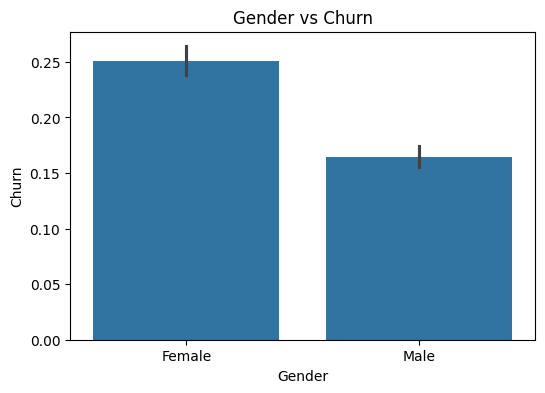

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Gender',y='Exited',data=df)
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Churn')
plt.show()

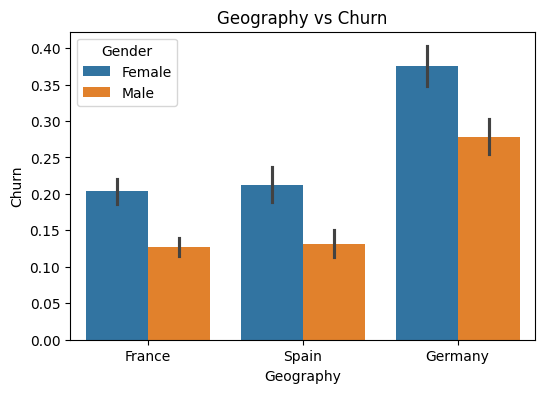

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x='Geography',y='Exited',hue='Gender',data=df)
plt.title('Geography vs Churn')
plt.xlabel('Geography')
plt.ylabel('Churn')
plt.show()

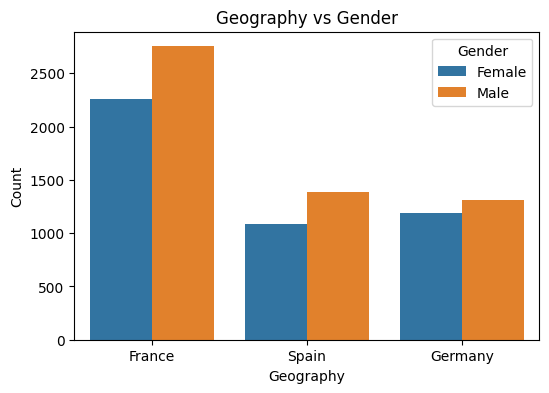

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Geography',hue='Gender',data=df)
plt.title('Geography vs Gender')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [19]:
num_df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)
num_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

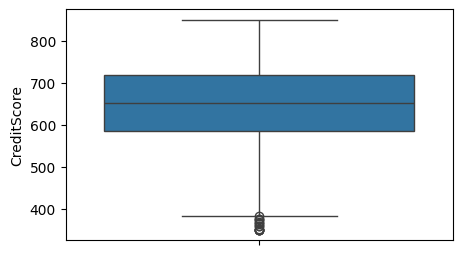

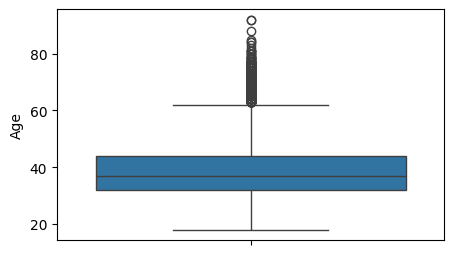

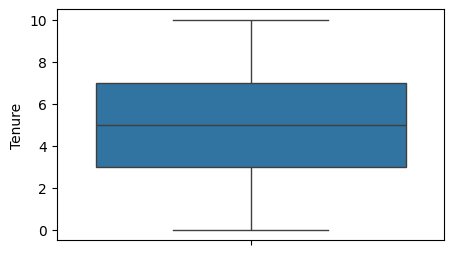

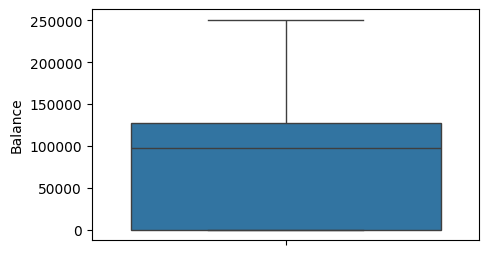

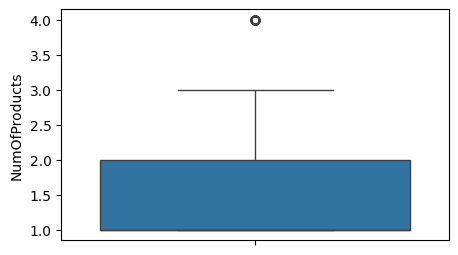

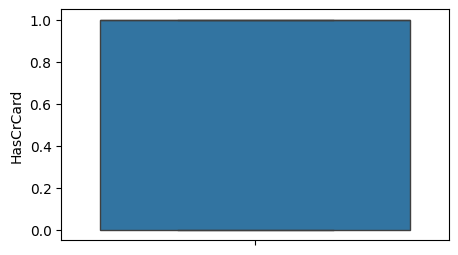

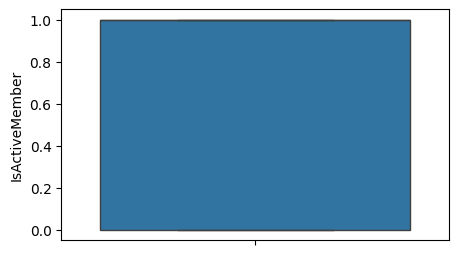

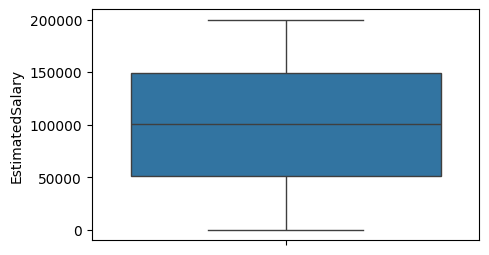

In [20]:
# Checking Outliers using Boxplot
for col in num_df.columns:
  if col != 'Exited':
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])
    plt.show()

In [21]:
def outlier_treatment(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  return x.clip(lower=lower_bound,upper=upper_bound)

cols = ['CreditScore','Age','NumOfProducts']

num_df[cols] = num_df[cols].apply(outlier_treatment)

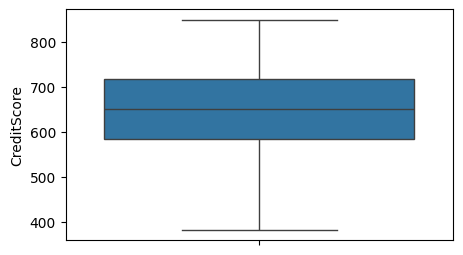

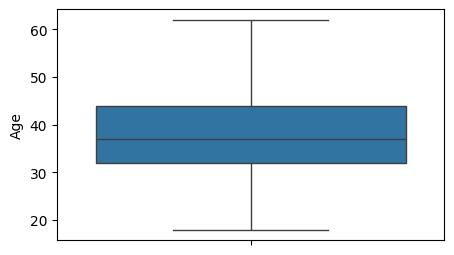

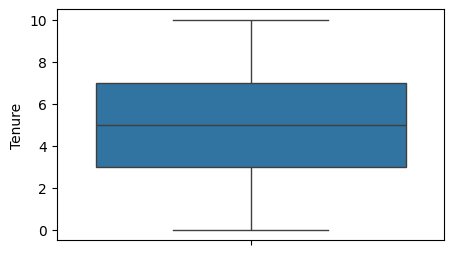

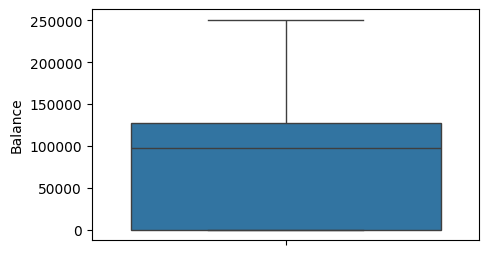

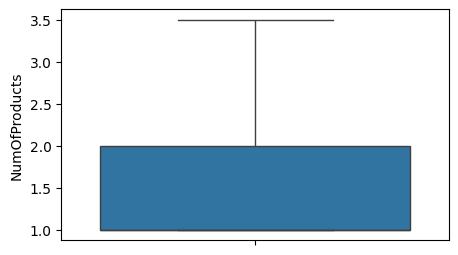

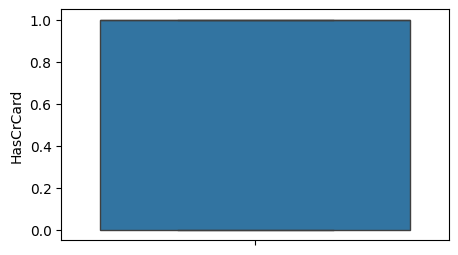

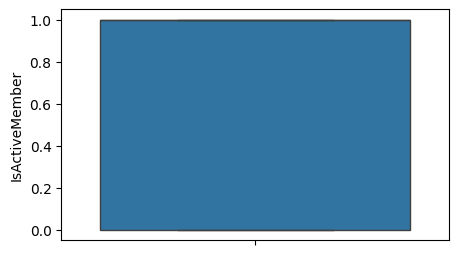

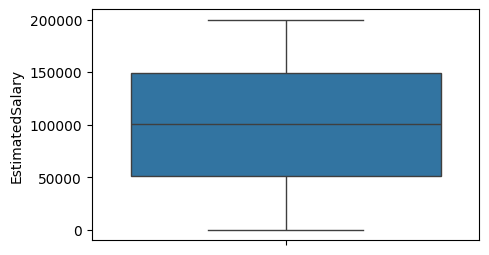

In [22]:
# Checking Outliers using Boxplot
for col in num_df.columns:
  if col != 'Exited':
    plt.figure(figsize=(5,3))
    sns.boxplot(num_df[col])
    plt.show()

# 5. Data Preprocessing

In [23]:
# Encoding categorical features
le = LabelEncoder()
cat_df['Geography'] = le.fit_transform(cat_df['Geography'])
cat_df['Gender'] = le.fit_transform(cat_df['Gender'])

In [24]:
cat_df.head()

Surname  Geography  Gender
0  Hargrave          0       0
1      Hill          2       0
2      Onio          0       0
3      Boni          0       0
4  Mitchell          2       0

In [25]:
cat_df.drop('Surname',axis=1,inplace=True)

In [26]:
cat_df.head()

Geography  Gender
0          0       0
1          2       0
2          0       0
3          0       0
4          2       0

In [27]:
# Concatinating num_df & cat_df into one datafrme
data = pd.concat([num_df,cat_df],axis=1)

In [28]:
data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00            1.0          1   
1          608   41       1   83807.86            1.0          0   
2          502   42       8  159660.80            3.0          1   
3          699   39       1       0.00            2.0          0   
4          850   43       2  125510.82            1.0          1   

   IsActiveMember  EstimatedSalary  Exited  Geography  Gender  
0               1        101348.88       1          0       0  
1               1        112542.58       0          2       0  
2               0        113931.57       1          0       0  
3               0         93826.63       0          0       0  
4               1         79084.10       0          2       0

In [29]:
# Split input features and out put feature
X = data.drop('Exited',axis=1)
y = data['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((8000, 10), (8000,))

# Model Implemantation

# I implement the following model
- Deciion Tree Classifier
- Random Forest Classifier
- XGBoost Classifier

In [30]:
# Initialize the model
tree = DecisionTreeClassifier()
model = tree.fit(X_train,y_train)

# making model predictions
trian_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [31]:
# Model evaluation
print('Training Accuracy : ',metrics.accuracy_score(y_train,trian_pred))
print('Testing Accuracy : ',metrics.accuracy_score(y_test,test_pred))
#

Training Accuracy :  1.0
Testing Accuracy :  0.7845


In [32]:
# Confuion matrix on training set
metrics.confusion_matrix(y_train,trian_pred)

array([[6356,    0],
       [   0, 1644]])

In [33]:
# Confusion matrix on testing set
metrics.confusion_matrix(y_test,test_pred)

array([[1364,  243],
       [ 188,  205]])

In [34]:
# Classification report on training set
print(metrics.classification_report(y_train,trian_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [35]:
# Classification report on testng set
print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.78      0.79      2000



# Implementing K-Fold Cross_Validation

In [36]:
cv_scores = cross_val_score(model,X,y,cv=5, scoring='accuracy')
print('Cross-validation scores:',cv_scores)
print('Mean Cv accuracy:',cv_scores.mean())

Cross-validation scores: [0.777 0.795 0.78  0.787 0.794]
Mean Cv accuracy: 0.7866000000000001


# Hyper tuning using GridsearchCV


In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,10,15,None],
    'min_samples_split': [2,5,10,20],
    'min_samples_leaf': [1,2,5,10],
    'max_features': ['sqrt', 'log2', None]
}


In [38]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [39]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross Validation Accuracy: 0.8548749999999998


# Decison Tree classifier model with optimal hyper parameters

In [40]:
model = DecisionTreeClassifier(criterion='entropy',
                               max_depth=5,
                               max_features=None,
                               min_samples_leaf=2,
                               min_samples_split=5
                               )
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

In [41]:
trainh_pred = model.predict(X_train)
testh_pred = model.predict(X_test)

In [42]:
# Model evaluation
print(metrics.accuracy_score(y_train,trainh_pred))
print(metrics.accuracy_score(y_test,testh_pred))


0.857
0.857


In [43]:
print(metrics.classification_report(y_train,trainh_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6356
           1       0.82      0.39      0.53      1644

    accuracy                           0.86      8000
   macro avg       0.84      0.68      0.72      8000
weighted avg       0.85      0.86      0.84      8000



In [44]:
print(metrics.classification_report(y_test,testh_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.79      0.37      0.51       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [45]:
train_accH = metrics.accuracy_score(y_train,trainh_pred)
test_accH = metrics.accuracy_score(y_test,testh_pred)

In [ ]:

dt_importance = model.feature_importances_

for feature, score in zip(X.columns, dt_importance):
    print(feature, score)


# Building RandomForestClassifier Model

In [48]:
# Implemenation of RandomForest with default parameters
model1 = RandomForestClassifier()
model1.fit(X_train,y_train)

# Making predicitons
train_pred1 = model1.predict(X_train)
test_pred1 = model1.predict(X_test)

In [49]:
# Evaluation of RandomForest Model
print(metrics.accuracy_score(y_train,train_pred1))
print(metrics.accuracy_score(y_test,test_pred1))


1.0
0.8665


In [50]:
print(metrics.classification_report(y_train,train_pred1))
print(metrics.classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6356
           1       1.00      1.00      1.00      1644

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [51]:
# Random Forest Model Cross validation
cv_scores = cross_val_score(model1,X,y,cv=5,scoring='accuracy')
print('Cross-validation scores:',cv_scores)
print('Mean Cv accuracy:',cv_scores.mean())

Cross-validation scores: [0.8575 0.87   0.859  0.865  0.8545]
Mean Cv accuracy: 0.8612


In [55]:
# Hyper Tuning for Random Forest Model using GridSearchCV
param_grid = {
    'n_estimators': [50,200,150],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


In [56]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200, 150]},
             scoring='accuracy', verbose=1)

In [57]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross Validation Accuracy: 0.8626249999999999


In [58]:
model1 = RandomForestClassifier(n_estimators= 200,
                                max_depth = 20 ,
                                min_samples_split= 2,
                                min_samples_leaf=5,
                                max_features='sqrt',
                                bootstrap =True,
                                oob_score=True)

In [59]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       oob_score=True)

In [60]:
trainR_pred = model1.predict(X_train)
testR_pred = model1.predict(X_test)
#

In [61]:
# Model evaluation
print(metrics.accuracy_score(y_train,trainR_pred))
print(metrics.accuracy_score(y_test,testR_pred))

0.9015
0.8625


In [62]:
print(metrics.classification_report(y_train,trainR_pred))
print(metrics.classification_report(y_test,testR_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6356
           1       0.92      0.57      0.70      1644

    accuracy                           0.90      8000
   macro avg       0.91      0.78      0.82      8000
weighted avg       0.90      0.90      0.89      8000

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



# XGBoost Classifier model implementation

In [64]:
# Implementing XGboost model
model2 = XGBClassifier()
model2.fit(X_train,y_train)

# Making predictions
train_pred2 = model2.predict(X_train)
test_pred2 = model2.predict(X_test)

In [65]:
# Evaluation of xgboost model
print(metrics.accuracy_score(y_train,train_pred2))
print(metrics.accuracy_score(y_test,test_pred2))


0.96
0.859


In [67]:
print(metrics.classification_report(y_train,train_pred2))
print(metrics.classification_report(y_test,test_pred2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6356
           1       0.97      0.83      0.90      1644

    accuracy                           0.96      8000
   macro avg       0.96      0.91      0.94      8000
weighted avg       0.96      0.96      0.96      8000

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.69      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [68]:
# Hyper tuning for Xgboost model

In [69]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [70]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.6}

In [71]:
grid_search.best_score_

np.float64(0.86425)

# XGBClassifier using optimal hyper parameters

In [73]:
model3 = XGBClassifier(max_depth=6,
                       min_child_weight=3,
                       n_estimators=100,
                       learning_rate=0.05,
                       subsample=0.6,
                       coalsample_bytree = 0.8,
                       gamma=0)
model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              coalsample_bytree=0.8, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [74]:
trainXH_pred = model3.predict(X_train)
testXH_pred = model3.predict(X_test)

In [75]:
# Model evaluation
print(metrics.accuracy_score(y_train,trainXH_pred))
print(metrics.accuracy_score(y_test,testXH_pred))

0.882625
0.868


In [76]:
print(metrics.classification_report(y_train,trainXH_pred))
print(metrics.classification_report(y_test,testXH_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6356
           1       0.84      0.53      0.65      1644

    accuracy                           0.88      8000
   macro avg       0.87      0.75      0.79      8000
weighted avg       0.88      0.88      0.87      8000

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [77]:
Accuracy = pd.DataFrame()
Accuracy['Model'] = ['Decision Tree','Decision Tree Optimal','Random Forest','Random Forest Optimal','XGBoost','XGboost Optimal']
Accuracy['Train_Accuracy'] = [100,86,100,90,96,88]
Accuracy['Test_Accuracy'] = [78,86,87,86,86,87]
Accuracy

Model  Train_Accuracy  Test_Accuracy
0          Decision Tree             100             78
1  Decision Tree Optimal              86             86
2          Random Forest             100             87
3  Random Forest Optimal              90             86
4                XGBoost              96             86
5        XGboost Optimal              88             87

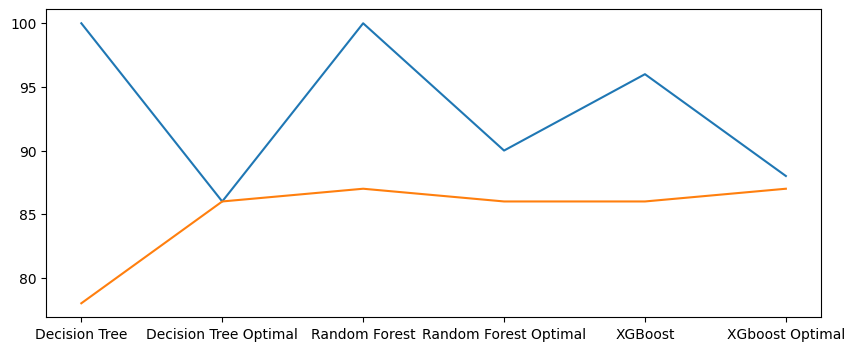

In [79]:
plt.figure(figsize=(10,4))
plt.plot('Model','Train_Accuracy',data=Accuracy)
plt.plot('Model','Test_Accuracy',data=Accuracy)
plt.show()

# Conclusion


Out of all models XGBoost model with optimal hyper parameters perform well on this dataset. XGBoost classifier with optimal hyper parameters got 88% in Training and 87% in Testing. Which is generalized model. So at the end XGBoost Classifier with best parameters is the best model.